# 回归模型建模例
回归问题-波士顿房价数据中,探索房价预测的问题

波士顿房价(Boston House Price)数据在这个数据集的每一行数据都是对波士顿周边或城镇的房价的描述,数据中包含如下14和特征，506条数据：

CRIM：城镇人均犯罪率

ZN：住宅地所占比例

INDUS：城镇中非住宅用地所占比例

CHAS：查尔斯河虚拟变量,1代表靠近河,0代表不靠近

NOX：环保指数

RM：平均每栋住宅的房间数

AGE：自住房屋比例

DIS：距离5个波士顿的就业中心的加权距离

RAD：距离高速公路的便利指数

TAX：每一万美元的不动产税率

PTRATIO：城镇中教师学生比例

B：城镇中黑人比例

LSTAT：地区中有多少房东属于低收入人群

y：自住房价中位数


# 1 导入相关库

In [30]:
from sklearn import linear_model
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
# 解决matplotlib中文问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# 2 读取数据

In [19]:
boston = datasets.load_boston()
df = pd.DataFrame(boston['data'],columns = boston['feature_names'])
df['target'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


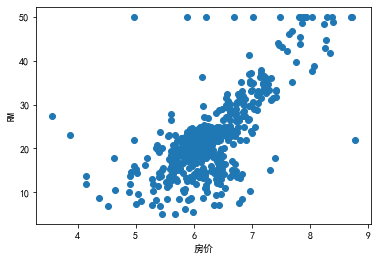

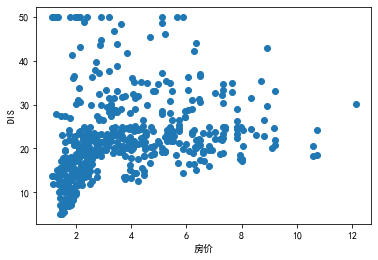

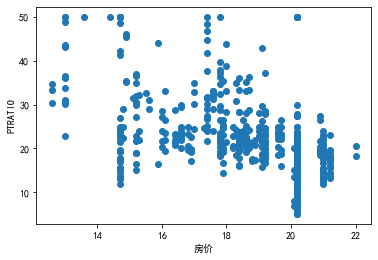

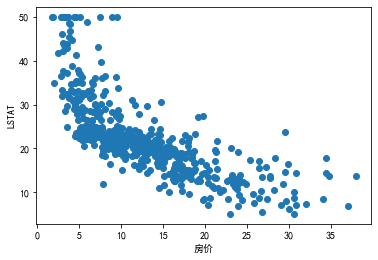

In [31]:
# 画出RM,DIS,PTRATIO,LSTAT与y的散点图,分析特征与y是否有线性关系?
# 尝试进行线性回归,使用RM,DIS,PTRATIO,LSTAT预测房价y,写出回归方程
plt.figure(num = 1)
list_x = ['RM','DIS','PTRATIO','LSTAT']
for i in range(4):
    plt.figure(num = i+1)
    x = df[list_x[i]]
    y = df['target']
    plt.scatter(x, 
                y
                )
    plt.xlabel("房价")
    plt.ylabel(list_x[i])

# 3 创建模型及预测

In [41]:
model =  linear_model.LinearRegression().fit(df[list_x],df.iloc[:,-1])
print('使用RM,DIS,PTRATIO,LSTAT预测房价，回归方程为：\n y = %s * RM + %s * DIS + %s * PTRATIO + %s * LSTAT + %s'%(reg.coef_[0],reg.coef_[1],reg.coef_[2],reg.coef_[3],model.intercept_ ))

使用RM,DIS,PTRATIO,LSTAT预测房价，回归方程为：
 y = 4.223792226168522 * RM + -0.5519263359753618 * DIS + -0.9736458428903774 * PTRATIO + -0.6654359842061548 * LSTAT + 24.4713576159747


In [43]:
# 解释下RM与Y的关系?
# 对某新小区,其RM=8,DIS=2,PTRATIO=12,LSTAT=22,预测该小区房价
# RM与房价y成正比，RM每增加1个单位，房价y平均增加4.22个单位；
model.predict([[8,2,12,22]])

array([30.83450099])